In [1]:
#considering the split in A2 this is the optimisation focused part using networkX (similar to A4 but this would be for a map)

## What is Optimization?

Optimization is the process of finding the most efficient or effective solution among many possible options. The goal is to make something as good as it can be, often within a set of given constraints. In simpler terms, optimization helps us make the best decision, whether that's saving time, reducing costs, or maximizing some form of output.

## Why is Optimization Important?

Optimization touches virtually every part of our lives and is essential in numerous fields:

- **Logistics:** Figuring out the most efficient route for delivery trucks to minimize driving time and fuel consumption.
- **Finance:** Building investment portfolios that maximize returns while minimizing risk.
- **Manufacturing:** Designing production processes that minimize waste and maximize output.

In our case, we're focusing on route planning. Imagine you're visiting Mumbai and want to see as many sights as possible in a single day. Optimization can help plan the most efficient route, ensuring you spend more time enjoying the sights and less time traveling between them.

## Optimization in Route Planning

Route planning is a classic optimization problem. The goal is to determine the quickest or shortest path through multiple points. This becomes especially complex in a bustling city like Mumbai, where factors like traffic and distances between locations add layers of challenge.

## The Role of Computers and Algorithms in Optimization

Humans are naturally good at making decisions, but when it comes to calculating the best among thousands or millions of options, computers take the lead. Algorithms, or sets of rules for solving problems, can evaluate multiple solutions quickly, identifying the optimal one even in complex scenarios.

For example, to plan our Mumbai tour, we'll use computational algorithms to sift through possible routes and select the one that covers all our points of interest in the least amount of time.

## Let's Discuss

Think about other areas where optimization can play a role. Have you noticed instances in your daily life where making one choice over another resulted in saving time, money, or just making things easier?

---

This introduction sets the stage for the exciting work ahead. As we move forward, we'll dive deeper into specific optimization techniques and see them in action as we plan our optimal tour of Mumbai. Stay tuned!

# Introduction to Greedy Algorithms

After exploring the basics of optimization, let's dive into a specific type of algorithm often used to find optimal solutions: the greedy algorithm. Greedy algorithms make a series of choices, each of which looks best at the moment. The hope is that these local optimal choices will lead to a globally optimal solution.

## What are Greedy Algorithms?

Greedy algorithms follow a simple process for solving problems:

1. **Examine your current options.**
2. **Choose the best option at the moment, without worrying about future consequences.**
3. **Repeat until all options have been explored or a satisfactory solution is reached.**

These algorithms are called "greedy" because they take the best choice available at each step, much like someone greedily choosing the largest slice of cake each time without considering the future slices.

## Characteristics of Greedy Algorithms

- **Short-sighted:** They make decisions from a local point of view without considering the bigger picture.
- **Fast:** They often provide a quick solution, making them suitable for problems where speed is crucial.
- **Not always optimal:** While greedy algorithms are efficient, they don’t always lead to the best overall solution.

## Applications of Greedy Algorithms

Greedy algorithms are used in a variety of applications, such as:

- **Finding the shortest path** in networking.
- **Scheduling tasks** on shared resources.
- **Data compression** techniques like Huffman Coding.

In our context of planning a tour around Mumbai, we could use a greedy algorithm to pick the next closest location until we have visited all desired spots.

## Why Use Greedy Algorithms for Route Optimization?

- **Simplicity:** Greedy algorithms are relatively simple to understand and implement.
- **Efficiency:** They can quickly provide a solution that, while not always perfect, is often good enough for practical purposes.
- **Suitability for Certain Problems:** For some types of optimization problems, a greedy strategy does indeed lead to the optimal solution.

## Limitations

Despite their advantages, greedy algorithms have limitations. They can sometimes make choices that seem best in the short term but lead to suboptimal solutions overall. This characteristic means that while they're a valuable tool in our toolkit, we need to use them judiciously and understand when they're appropriate to apply.

#now lets move on to learning and using NetworkX

# Network Analysis with NetworkX: Optimizing Hospital Navigation

This tutorial guides you through using NetworkX to analyze and optimize navigation within a hospital setting. We'll create a network model of the hospital, identify key areas and paths, and apply algorithms to find the most efficient routes for various scenarios.

## Step 1: Setting Up Your Environment

Before we begin, you need to install Python, NetworkX, and matplotlib. Run the following command in your terminal:

```bash
pip install networkx matplotlib


### Building the Network 
For this demonstration I am going to create and simulate a hospital in the form of a network

In [2]:
import networkx as nx

# Initialize the graph
G = nx.Graph()

# Nodes represent departments or key areas in the hospital
nodes = ["Entrance", "Reception", "Emergency", "ICU", "Ward A", "Ward B", "Cafeteria", "Laboratory", "Pharmacy", "Surgery"]

G.add_nodes_from(nodes)

# Edges represent hallways or paths between these areas, with weights indicating distance, time, or effort required to traverse
edges = [
    ("Entrance", "Reception", 1),
    ("Reception", "Emergency", 2),
    ("Emergency", "ICU", 2),
    ("ICU", "Surgery", 3),
    ("Reception", "Ward A", 2),
    ("Ward A", "Ward B", 2),
    ("Ward B", "Cafeteria", 4),
    ("Cafeteria", "Laboratory", 3),
    ("Laboratory", "Pharmacy", 2),
    ("Pharmacy", "Surgery", 3),
    ("Surgery", "ICU", 2),
    ("Emergency", "Laboratory", 4)
]

G.add_weighted_edges_from(edges, weight='distance')


# Mathematical Foundations of Network Analysis

Network analysis involves understanding the structure and behavior of networks. In this context, networks are modeled as graphs \( G = (V, E) \), where \( V \) represents nodes (key areas in the hospital) and \( E \) represents edges (paths connecting these areas), with weights assigned to edges based on distance, time, or effort required to traverse them.

## Betweenness Centrality

Betweenness centrality measures the extent to which a node lies on paths between other nodes. Mathematically, it's defined for a node $ v $ as:

$ C_B(v) = \sum_{s,t \in V} \frac{\sigma_{st}(v)}{\sigma_{st}} $

where $ \sigma_{st} $ is the total number of shortest paths from node $ s $ to node $ t $ and $ \sigma_{st}(v) $ is the number of those paths passing through $ v $. This measure helps identify high-traffic areas or critical points within the hospital.


### Step 3: Analyzing the Network
With our network built, let's analyze its structure. We're particularly interested in the betweenness centrality, which can highlight nodes that act as critical connectors within the network.

In [3]:
# Calculate betweenness centrality
centrality = nx.betweenness_centrality(G, weight='distance')
print("Betweenness Centrality:", centrality)


Betweenness Centrality: {'Entrance': 0.0, 'Reception': 0.4444444444444444, 'Emergency': 0.4444444444444444, 'ICU': 0.1388888888888889, 'Ward A': 0.19444444444444442, 'Ward B': 0.08333333333333333, 'Cafeteria': 0.05555555555555555, 'Laboratory': 0.25, 'Pharmacy': 0.05555555555555555, 'Surgery': 0.027777777777777776}


### Step 4: Finding the Optimal Path
To optimize hospital navigation, we'll find the shortest path for a hypothetical emergency scenario using Dijkstra's algorithm.

Dijkstra's algorithm is a pathfinding algorithm used to find the shortest path between nodes in a graph. It works by systematically selecting the "closest" node until it reaches the target node, ensuring the path found is of minimum weight. The mathematical beauty of Dijkstra's algorithm lies in its use of a priority queue to efficiently find the closest unvisited node at each step.

Here is essentially how it works:

# Dijkstra's Algorithm Explanation

Dijkstra's algorithm is a well-known algorithm for finding the shortest paths between nodes in a graph, which may represent, for example, road networks. The algorithm works on both directed and undirected graphs. However, all edges must have nonnegative weights.

## How Dijkstra's Algorithm Works

The core idea of the algorithm is to keep a track of the shortest distance from a starting node to all other nodes in the graph. Initially, these distances are set to infinity, except for the start node, which is set to zero.

The algorithm uses a set, often referred to as the "unvisited set", which tracks all the nodes that have not been visited yet. Initially, this set contains all nodes.

Here's a step-by-step breakdown:

1. Assign to every node a tentative distance value: set it to zero for the initial node and to infinity for all other nodes.
2. Set the initial node as current. Mark all other nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.
3. For the current node, consider all of its unvisited neighbors and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one.
4. Once we have considered all of the unvisited neighbors of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will not be checked again.
5. If the destination node has been marked visited, then stop. The algorithm has finished.
6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

## The Mathematics Behind Dijkstra's Algorithm

Let's denote:

- $G = (V, E)$ as a graph with vertices $V$ and edges $E$
- $d(v)$ as the tentative distance value of vertex $v$
- $prev(v)$ as the previous node in the optimal path from the source

When we are at node $u$, we look at each neighbor $v$ of $u$ and update $d(v)$ and $prev(v)$ if we find a shorter path to $v$. This update step is often called "relaxation" and is defined mathematically by the following procedure:

$$\text{if } d(u) + \text{Length}(u, v) < d(v)$$
$$\text{then } d(v) = d(u) + \text{Length}(u, v)$$
$$\text{and } prev(v) = u$$

Here, $\text{Length}(u, v)$ represents the edge length between $u$ and $v$.

The algorithm continues this process until all nodes have been visited. The shortest path can then be found by backtracking from the destination node to the start node using the $prev$ array.

## Complexity

The time complexity of Dijkstra's algorithm depends on the data structures used for the set of unvisited nodes:

- Using a simple linear array, it has a time complexity of $O(V^2)$.
- Using a priority queue, this can be reduced to $O((V + E) \log V)$, which is more efficient for sparse graphs.

Dijkstra's algorithm is thus both computationally efficient and conceptually straightforward, making it a popular choice for problems in network routing, geographical mapping, and in many fields where one needs to find the shortest path between points.


In [4]:
# Find the shortest path from the entrance to the ICU
shortest_path = nx.dijkstra_path(G, source='Entrance', target='ICU', weight='distance')
print("Shortest path from Entrance to ICU:", shortest_path)


Shortest path from Entrance to ICU: ['Entrance', 'Reception', 'Emergency', 'ICU']


### Step 5: Visualizing the Network and the Optimal Path
Visualizing the network helps us better understand the layout and the efficiency of the optimal path we've identified

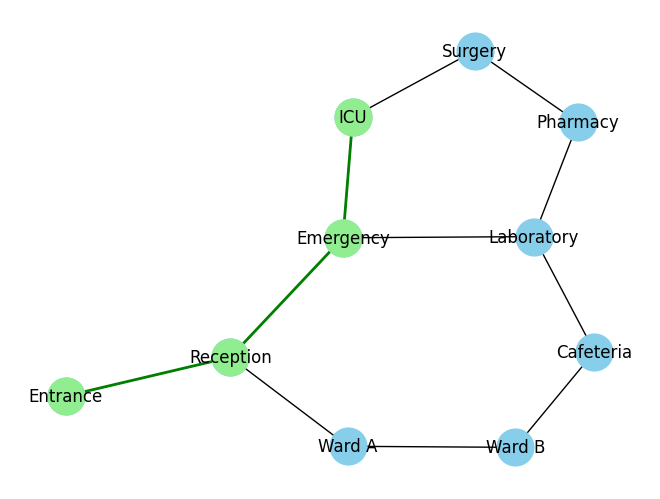

In [5]:
import matplotlib.pyplot as plt

# Position nodes using the spring layout
pos = nx.spring_layout(G)

# Draw the entire network
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')

# Highlight the shortest path in a different color
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='lightgreen', node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=2)

plt.show()


Now lets try the same with a more complex network

In [6]:
pip install haversine 

Note: you may need to restart the kernel to use updated packages.


In [7]:
import networkx as nx
import numpy as np
from haversine import haversine, Unit
from itertools import permutations

In [21]:
# Define locations
visit_locations = {
    "Gateway of India": (18.922197212382244, 72.83463283846335),
    # "Siddhivinayak Temple": (19.021534126149678, 72.82954139263343),
    "Chatrapati Shivaji Maharaj Terminus": (19.086359082765988, 72.87707662455138),
    "Basillica of our lady of the Mount": (19.04679133584144, 72.82237813661428),
    "Elephanta Caves": (18.967719075671724, 72.93024421709197),
    "Haji Ali Dargah": (18.98292939494957, 72.8142093730092),
    "Bombay Scottish School": (19.03572220741307, 72.83954954994066),
    # "Nariman Point": (18.928097884373383, 72.8212384057339),
    "Bandra Bandstand": (19.050739089058823, 72.82144756915424),
    # "Mehboob Studios": (19.05255770437557, 72.82510143846642),
    "Hanging Gardens": (18.963118256796044, 72.80433979759515),
    # "Dharavi": (19.045010573980722, 72.84442605451348),
    # "Mahalaxmi Race Course": (18.984381351802448, 72.82015039798866),
}

lunch_locations = {
    "Nara Thai - BKC": (19.061190612698244, 72.8628789977218),
    # "Yauatcha - BKC": (19.061135475067527, 72.86285050777863),
    # "Cin Cin - BKC": (19.061158440398845, 72.86302308079453),
    # "Foo - Bandra": (19.060281357511816, 72.83627519613857),
    "Silly - Bandra": (19.06827494498463, 72.8376833384668),
    "Hakkasan - Bandra": (19.06099540985429, 72.83463191148253),
    # "Golden Chimney - Town": (18.95868818473362, 72.81623322312022),
    # "The Bay View - Town": (18.931463970456903, 72.82312450620513),
}

In [22]:
# Haversine distance function
def calculate_distance(coord1, coord2):
    return haversine(coord1, coord2, unit=Unit.KILOMETERS)

# Assume an average speed (km per hour), convert to minutes per kilometer
average_speed_kmph = 20
minutes_per_km = 60 / average_speed_kmph

# Function to calculate travel time between two points
def travel_time(coord1, coord2):
    distance = calculate_distance(coord1, coord2)
    return distance * minutes_per_km

In [23]:
# Build a graph
G = nx.Graph()




# Add visit locations as nodes
for loc, coord in visit_locations.items():
    G.add_node(loc, coord=coord)

# Add lunch locations as nodes
for loc, coord in lunch_locations.items():
    G.add_node(loc, coord=coord)

# Add edges between all locations with travel times as weights
for loc1, coord1 in G.nodes(data='coord'):
    for loc2, coord2 in G.nodes(data='coord'):
        if loc1 != loc2:
            time = travel_time(coord1, coord2)
            G.add_edge(loc1, loc2, weight=time)

In [24]:
# # Add edges between visit locations with travel times as weights
# for loc1, coord1 in visit_locations.items():
#     for loc2, coord2 in visit_locations.items():
#         if loc1 != loc2:
#             G.add_edge(loc1, loc2, weight=travel_time(coord1, coord2))

In [25]:
# # Add lunch locations as nodes
# for lunch_loc, coord in lunch_locations.items():
#     G.add_node(lunch_loc)

In [26]:
# Helper function to add lunch break and calculate total route time
def calculate_total_time(route):
    total_time = 0
    # Add visit time
    total_time += (len(route) - 1) * 10
    # Calculate travel time
    for i in range(len(route) - 1):
        total_time += nx.dijkstra_path_length(G, route[i], route[i+1], weight='weight')
    return total_time

In [27]:
# # Function to find the best route with a lunch break
# def find_best_route_with_lunch(G, visit_locations, lunch_locations):
#     best_time = float('inf')
#     best_route = None

#     # Try each lunch location
#     for lunch_loc in lunch_locations:
#         # Combine visit locations with this lunch location
#         all_stops = list(visit_locations.keys()) + [lunch_loc]
        
#         # Permutations of all visit locations (excluding lunch)
#         for perm in permutations(visit_locations.keys()):
#             route_with_lunch = list(perm) + [lunch_loc]
            
#             # Calculate the total time with 30 min added for lunch
#             route_time = calculate_total_time(route_with_lunch) + 30
#             if route_time < best_time and route_time <= 420: # 7 hours limit
#                 best_time = route_time
#                 best_route = route_with_lunch
    
#     return best_route, best_time

from itertools import permutations
from tqdm import tqdm

# Function to find the best route with a lunch break
def find_best_route_with_lunch(G, visit_locations, lunch_locations):
    best_time = float('inf')
    best_route = None

    # Total number of permutations
    total_perms = np.math.factorial(len(visit_locations))
    
    # Initialize tqdm progress bar
    pbar = tqdm(total=total_perms, desc='Evaluating permutations')

    # Try each lunch location
    for lunch_loc in lunch_locations:
        # Combine visit locations with this lunch location
        all_stops = list(visit_locations.keys()) + [lunch_loc]
        
        # Permutations of all visit locations (excluding lunch)
        for perm in permutations(visit_locations.keys()):
            route_with_lunch = list(perm) + [lunch_loc]
            
            # Calculate the total time with 30 min added for lunch
            route_time = calculate_total_time(route_with_lunch) + 30
            if route_time < best_time and route_time <= 420: # 7 hours limit
                best_time = route_time
                best_route = route_with_lunch

            # Update progress after each permutation is evaluated
            pbar.update(1)

    # Close the progress bar
    pbar.close()

    return best_route, best_time


In [28]:
# Find the best route with lunch
best_route, best_time = find_best_route_with_lunch(G, visit_locations, lunch_locations)

# Output the best route and time
print("Best Route:", best_route)
print("Total Time (minutes):", best_time)

/var/folders/bc/fdw8_fgd5rv0sjs0k9ydcmpw0000gn/T/ipykernel_36863/3625288966.py:32: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  total_perms = np.math.factorial(len(visit_locations))
Evaluating permutations: 120960it [00:12, 10015.63it/s]                         

Best Route: ['Elephanta Caves', 'Gateway of India', 'Hanging Gardens', 'Haji Ali Dargah', 'Bombay Scottish School', 'Basillica of our lady of the Mount', 'Bandra Bandstand', 'Chatrapati Shivaji Maharaj Terminus', 'Nara Thai - BKC']
Total Time (minutes): 225.68490313166993


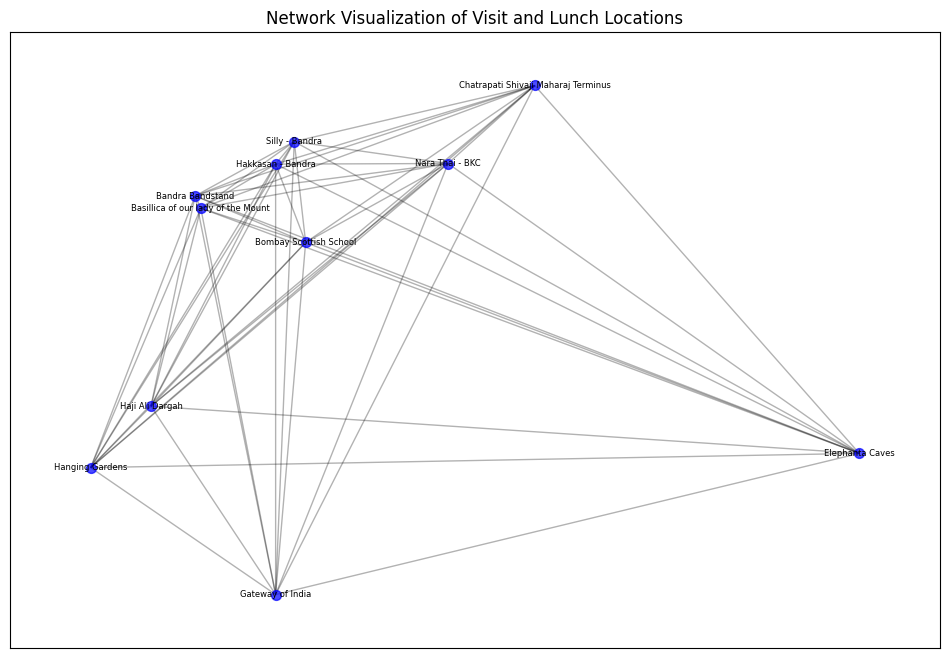

In [29]:
import matplotlib.pyplot as plt
import networkx as nx


# Extract latitude and longitude from the node data to use as positions
pos = {node: (data['coord'][1], data['coord'][0]) for node, data in G.nodes(data=True)}

# Draw the network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=6)

plt.title('Network Visualization of Visit and Lunch Locations')
plt.show()


Now as we can see above, there has been a network of places generated 
Now lets plot and visualise the optimal path

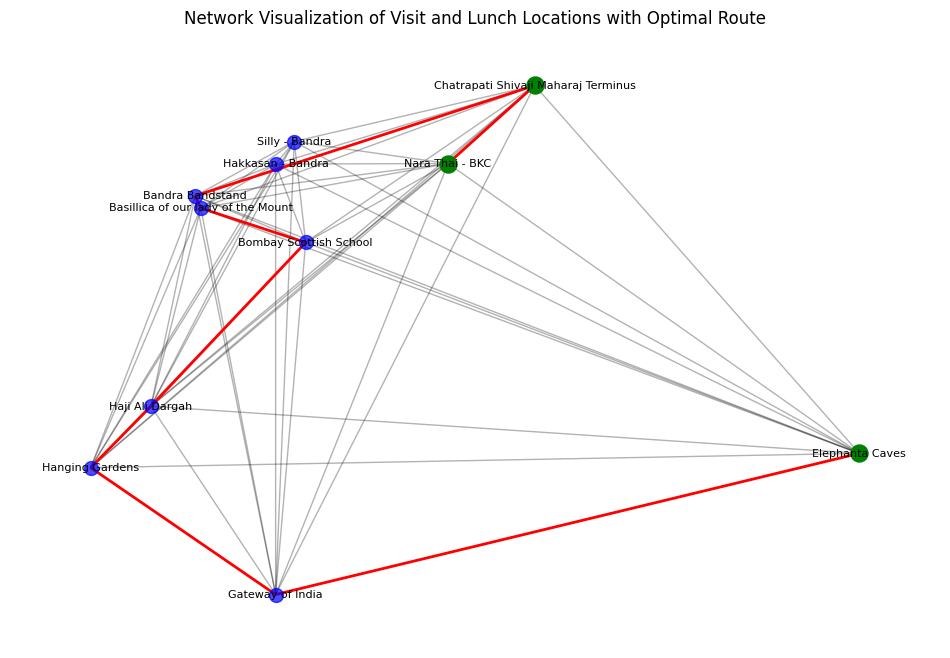

In [31]:
# Draw the network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

# Draw the optimal route with distinct properties
path_edges = list(zip(best_route[:-1], best_route[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

# Optional: Highlight start, end, and lunch locations
start_node = best_route[0]
end_node = best_route[-2]  # Last visit location, assuming last node is lunch
lunch_node = best_route[-1]
nx.draw_networkx_nodes(G, pos, nodelist=[start_node, end_node, lunch_node], node_size=150, node_color='green')

plt.title('Network Visualization of Visit and Lunch Locations with Optimal Route')
plt.axis('off') # Hide the axes
plt.show()


In [ ]:
#edits: for optimal path we are currently using brute force, use greedy or dikjstras 
#for greedy is two lines crossig better to have in parallel instead